In [9]:
import pandas as pd
import matplotlib as plt
from scipy import stats
import numpy as np

In [4]:
df = pd.read_csv('rainfall_data/rainfall_india.csv')

df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


Shape: 0.5332815683513092, Location: 0, Scale: 41.71664530860785


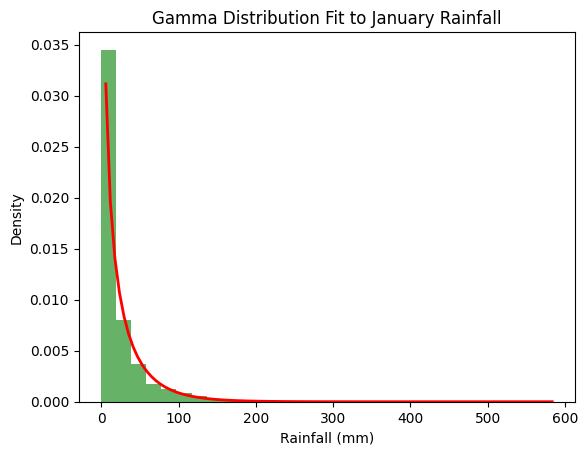

In [11]:
# think that rainfall in JAN is gamma distributed and estimate its parameters

jan_rainfall = df['JAN']
jan_rainfall = jan_rainfall[jan_rainfall > 0]  # remove zero values
# fit a gamma distribution to the data
shape, loc, scale = stats.gamma.fit(jan_rainfall, floc=0)
print(f"Shape: {shape}, Location: {loc}, Scale: {scale}")
# plot the histogram of the data
plt.pyplot.hist(jan_rainfall, bins=30, density=True, alpha=0.6, color='g')
# plot the fitted gamma distribution
x = np.linspace(0, jan_rainfall.max(), 100)
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)
plt.pyplot.plot(x, pdf, 'r-', lw=2)
plt.pyplot.title('Gamma Distribution Fit to January Rainfall')
plt.pyplot.xlabel('Rainfall (mm)')
plt.pyplot.ylabel('Density')
plt.pyplot.show()



Shape: 2.7932780634164835, Location: 0, Scale: 505.14444595955604


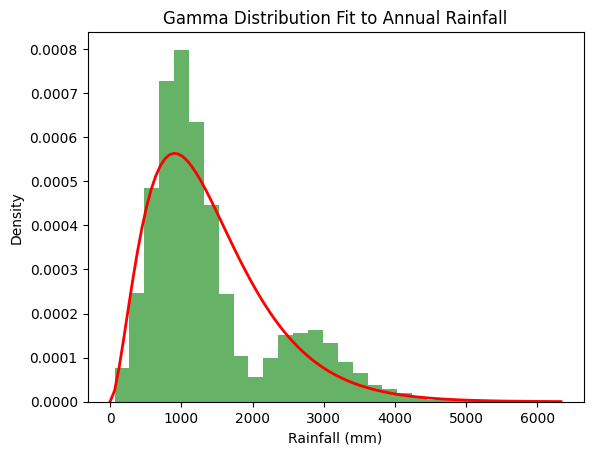

In [15]:
# assume the Annual rainfall is gamma distributed and estimate its parameters
annual_rainfall = df['ANNUAL']
annual_rainfall = annual_rainfall[annual_rainfall > 0]  # remove zero values
# fit a gamma distribution to the data
shape, loc, scale = stats.gamma.fit(annual_rainfall, floc=0)
print(f"Shape: {shape}, Location: {loc}, Scale: {scale}")
# plot the histogram of the data
plt.pyplot.hist(annual_rainfall, bins=30, density=True, alpha=0.6, color='g')
# plot the fitted gamma distribution
x = np.linspace(0, annual_rainfall.max(), 100)
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)
plt.pyplot.plot(x, pdf, 'r-', lw=2)
plt.pyplot.title('Gamma Distribution Fit to Annual Rainfall')
plt.pyplot.xlabel('Rainfall (mm)')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

Mean: 1411.0088997555013, Std: 903.7360635097127


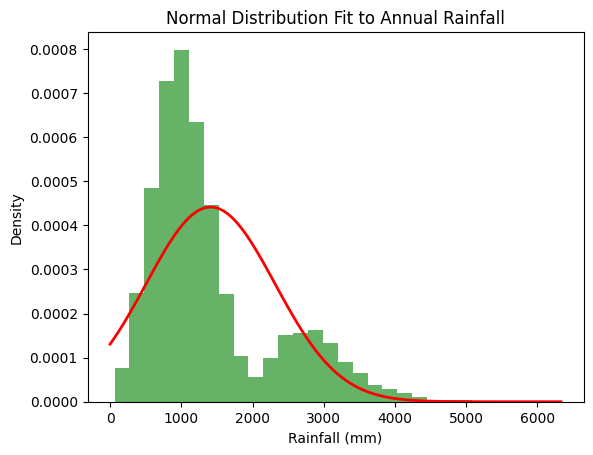

In [24]:
#think of Annual rainfall as normal distributed and estimate its parameters
annual_rainfall = df['ANNUAL']
annual_rainfall = annual_rainfall[annual_rainfall > 0]  # remove zero values
# fit a normal distribution to the data
mu, std = stats.norm.fit(annual_rainfall)
print(f"Mean: {mu}, Std: {std}")
# plot the histogram of the data
plt.pyplot.hist(annual_rainfall, bins=30, density=True, alpha=0.6, color='g')
# plot the fitted normal distribution
x = np.linspace(0, annual_rainfall.max(), 100)
pdf = stats.norm.pdf(x, mu, std)
plt.pyplot.plot(x, pdf, 'r-', lw=2)
plt.pyplot.title('Normal Distribution Fit to Annual Rainfall')
plt.pyplot.xlabel('Rainfall (mm)')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

In [56]:
# calculat the 95% confidence interval for the variance of Annual rainfall

alpha = 0.05
# take a sample
sample = np.random.choice(annual_rainfall, size=100, replace=False)
n = len(sample)
# calculate the sample variance
s2 = np.var(sample, ddof=1)
# calculate the chi-squared critical values
chi2_lower = stats.chi2.ppf(alpha / 2, n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, n - 1)
# calculate the confidence interval
ci_lower = (n - 1) * s2 / chi2_upper
ci_upper = (n - 1) * s2 / chi2_lower
print(f"95% Confidence Interval for Variance: ({ci_lower}, {ci_upper})")
print(f"95% Confidence Interval for Standard Deviation: ({np.sqrt(ci_lower)}, {np.sqrt(ci_upper)})")

95% Confidence Interval for Variance: (602812.0634745607, 1055250.601109577)
95% Confidence Interval for Standard Deviation: (776.4097265455661, 1027.2539126766942)
